# 作業二：MLB 資料視覺化

## 作業要求：
* 使用提供的 .ipynb 模板
* 計算所有大聯盟球員的平均得分（Runs）將球員分為「高得分」與「低得分」兩組
* 將兩組球員的 *得分指標（如下）* 全部相加 畫出這兩組的 correlation matrix
* 解釋你對結果的看法

## 得分指標
* 得分（Runs Scored, R）
* 打點（Runs Batted In, RBI）
* 安打數（Hits, H）
* 全壘打數（Home Runs, HR）
* 打擊率（Batting Average, AVG）
* 上壘率（On-Base Percentage, OBP）
* 長打率（Slugging Percentage, SLG）
* 盜壘數（Stolen Bases, SB）
* 打數（At Bats, AB）
* 四壞球率（Walks, BB）
* 被三振數（Strikeouts, K）


## 引入套件
這份作業會使用：
* [pandas](https://pandas.pydata.org/)
* [seaborn](https://seaborn.pydata.org/)
* [matplotlib](https://matplotlib.org/)

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 讀取檔案
使用 pandas 讀入 csv 檔，成為 dataframe

In [11]:
## TODO 2: 讀取檔案


# 讀取你的檔案
mlb_df = pd.read_csv('get_data/get_data/data.csv')

# 檢查
mlb_df.head

<bound method NDFrame.head of                PLAYER TEAM   G  AB  R   H  2B  3B  HR  RBI  BB  SO  SB  CS  \
0      Michael Harris  ATL   2   8  2   5   1   0   1    2   0   1   0   0   
1     Jackson Chourio  MIL   3  11  3   5   0   0   2    3   1   1   1   0   
2      Fernando Tatis   SD   7  26  8  11   3   0   4    7   3   2   0   0   
3      Cedric Mullins  BAL   2   7  1   3   1   0   1    1   0   1   0   0   
4        Bryce Harper  PHI   4  12  3   4   2   0   1    3   5   5   0   0   
..                ...  ...  ..  .. ..  ..  ..  ..  ..  ...  ..  ..  ..  ..   
86      Orlando Arcia  ATL   2   6  1   1   0   0   0    0   0   2   0   0   
87  William Contreras  MIL   3  12  0   2   0   0   0    2   0   3   0   0   
88      J.T. Realmuto  PHI   4  11  1   0   0   0   0    1   3   4   0   0   
89  Francisco Alvarez  NYM  10  35  1   5   0   0   0    1   1  13   0   0   
90      Colton Cowser  BAL   2   7  0   1   0   0   0    0   0   3   0   0   

      AVG    OBP    SLG    OPS  


## 處理資料
在這步驟，我們要先計算所有球員的平均得分，從而將球員分成高得分組與低得分組

In [13]:
# TODO 3: 處理資料

# 計算所有球員 Runs 的平均值
R_mean = mlb_df['R'].mean()

# 將球員分成得分高於平和低於平均兩組
above_avg_df = mlb_df[mlb_df['R'] > R_mean]
below_avg_df = mlb_df[mlb_df['R'] <= R_mean]

## 資料視覺化
我們要分別對上面兩 dataframe 算出 [correlation matrix](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)，並使用 [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 為其視覺化

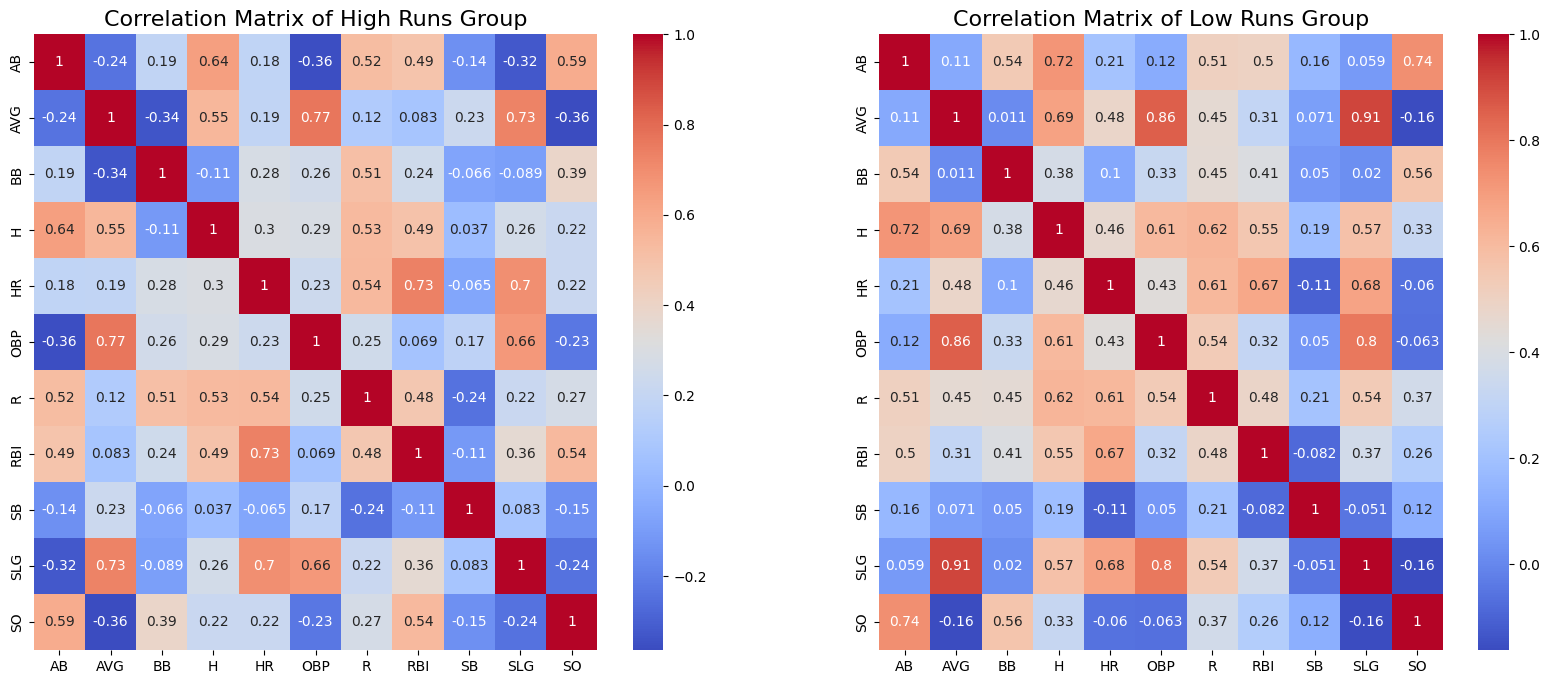

In [16]:
# TODO 4: 資料視覺化

# 要計算的欄位
# numeric_cols = ['R', 'RBI', 'H', 'HR', 'AVG', 'OBP', 'SLG', 'SB', 'AB', 'BB', 'K']
numeric_cols = ['A', 'AB', 'AVG', 'BB', 'H', 'HR', 'OBP', 'R', 'RBI', 'SB', 'SLG', 'SO']


numeric_cols = [col for col in numeric_cols if col in above_avg_df.columns and col in below_avg_df.columns]

# Calculate correlation matrix
above_avg_cor_matrix = above_avg_df[numeric_cols].corr()
below_avg_cor_matrix = below_avg_df[numeric_cols].corr()

# Plot the heatmaps side by side
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)  # Set subplot position for high runs group
sns.heatmap(above_avg_cor_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of High Runs Group', fontsize=16)

plt.subplot(1, 2, 2)  # Set subplot position for low runs group
sns.heatmap(below_avg_cor_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Low Runs Group', fontsize=16)

plt.show()

## 你的解讀
請回下列問題（直接將回答寫在這個 cell）

### Q1: 影響「高得分組」球員得分（Runs, R）較多的得分指標，和影響影響「低得分組」較多的指標一樣嗎？
TODO 5

### Q2: 從這兩者的差距中，你觀察到了什麼、會如何解讀這樣的差距呢？（例如，你能說出影響球員是否會成為高得分球員的關鍵因素嗎？）
TODO 6